<a href="https://colab.research.google.com/github/MilyutinNA/pytorch-learning/blob/main/2_Preliminaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.1 Data Manipulation

# 2.1.1 Getting Started


In [ ]:
import torch

In [ ]:
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [ ]:
x.numel()

12

In [ ]:
x.shape

torch.Size([12])

In [ ]:
X1 = x.reshape(3,4)
X1

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [ ]:
X1.shape

torch.Size([3, 4])

In [ ]:
X2 = x.reshape(-1,4)
X2

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [ ]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [ ]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [ ]:
torch.randn(3, 4)

tensor([[ 1.6209,  0.0604,  0.5803, -0.8344],
        [ 1.9828,  0.2932,  0.7634, -0.2548],
        [-1.7657,  0.1356, -1.2654,  2.1025]])

In [ ]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])



> # 2.1.2 Indexing and Slicing

In [ ]:
X1[-1], X1[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [ ]:
X1[1,2] = 17
X1

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5., 17.,  7.],
        [ 8.,  9., 10., 11.]])

In [ ]:
X1[:2, :] = 12
X1

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

In [ ]:
X1[:2, 1:3] = 3
X1

tensor([[12.,  3.,  3., 12.],
        [12.,  3.,  3., 12.],
        [ 8.,  9., 10., 11.]])

# 2.1.3 Operations

In [ ]:
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [ ]:
torch.exp(x)

tensor([1.0000e+00, 2.7183e+00, 7.3891e+00, 2.0086e+01, 5.4598e+01, 1.4841e+02,
        4.0343e+02, 1.0966e+03, 2.9810e+03, 8.1031e+03, 2.2026e+04, 5.9874e+04])

In [ ]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [ ]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [ ]:
X == Y

tensor([[False,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]])

In [ ]:
X.sum()

tensor(66.)

# 2.1.4 Broadcasting

In [ ]:
a = torch.arange(1,4).reshape((3, 1))
b = torch.arange(1,3).reshape((1, 2))
a, b

(tensor([[1],
         [2],
         [3]]),
 tensor([[1, 2]]))

In [ ]:
a+b

tensor([[2, 3],
        [3, 4],
        [4, 5]])

# 2.1.5 Saving Memory

In [ ]:
before = id(Y)
Y=Y+X
id(Y) == before

False

In [ ]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 136631369981024
id(Z): 136631369981024


In [ ]:
before = id(X)
X += Y
id(X) == before

True

# 2.1.6 Conversion to Other Python Objects

In [ ]:
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [ ]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

# 2.2 Data Preprocessing

# 2.2.1 Reading the Dataset

In [ ]:
import os
os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

In [ ]:
import pandas as pd
data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000



# 2.2.2 Data Preparation

In [ ]:
inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]
print(inputs, targets, sep='\n\n')
inputs = pd.get_dummies(inputs, dummy_na=True)
print('\n', inputs)

   NumRooms RoofType
0       NaN      NaN
1       2.0      NaN
2       4.0    Slate
3       NaN      NaN

0    127500
1    106000
2    178100
3    140000
Name: Price, dtype: int64

    NumRooms  RoofType_Slate  RoofType_nan
0       NaN           False          True
1       2.0           False          True
2       4.0            True         False
3       NaN           False          True


In [ ]:
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0           False          True
1       2.0           False          True
2       4.0            True         False
3       3.0           False          True


# 2.2.3 Conversion to the Tensor Format

In [ ]:
import torch
X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(targets.to_numpy(dtype=float))
X, y


(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

#2.3 Linear Algebra

#2.3.1 Scalars

In [ ]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)
x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

# 2.3.2 Vectors

In [ ]:
x = torch.arange(3)
x

tensor([0, 1, 2])

In [ ]:
x[2]

tensor(2)

In [ ]:
len(x)

3

In [ ]:
x.shape

torch.Size([3])

# 2.3.3 Matrices

In [ ]:
A = torch.arange(6).reshape(3, 2)
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [ ]:
A.T

tensor([[0, 2, 4],
        [1, 3, 5]])

In [ ]:
A = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
A == A.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

# 2.3.4 Tensors

In [ ]:
torch.arange(24).reshape(2, 3, 4)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

# 2.3.5 Basic Properties of Tensor Arithmetic

In [ ]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = A.clone()  # Assign a copy of A to B by allocating new memory
A, A + B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

In [ ]:
A*B

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

In [ ]:
a=2
X = torch.arange(24).reshape(2, 3, 4)
X, a + X, (a * X).shape

(tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]),
 tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

# 2.3.6 Reduction

In [ ]:
x = torch.arange(3, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2.]), tensor(3.))

In [ ]:
A, A.shape, A.sum()

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 torch.Size([2, 3]),
 tensor(15.))

In [ ]:
A, A.shape, A.sum(axis=0), A.sum(axis=0).shape

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 torch.Size([2, 3]),
 tensor([3., 5., 7.]),
 torch.Size([3]))

In [ ]:
A, A.shape, A.sum(axis=1), A.sum(axis=1).shape

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 torch.Size([2, 3]),
 tensor([ 3., 12.]),
 torch.Size([2]))

In [ ]:
A.sum(axis=[0, 1]) == A.sum()

tensor(True)

In [ ]:
A.sum(), A.numel(), A.sum() / A.numel(), A.mean()

(tensor(15.), 6, tensor(2.5000), tensor(2.5000))

In [ ]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([1.5000, 2.5000, 3.5000]), tensor([1.5000, 2.5000, 3.5000]))

# 2.3.7 Non-Reduction Sum

In [ ]:
sum_A = A.sum(axis=1, keepdims=False) #по умолчанию keepdims=False
sum_A, sum_A.shape

(tensor([ 3., 12.]), torch.Size([2]))

In [ ]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A, sum_A.shape

(tensor([[ 3.],
         [12.]]),
 torch.Size([2, 1]))

In [ ]:
A / sum_A # с keepdims=False мы не можем выполнить такую операцию

tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])

In [ ]:
C = torch.arange(27, dtype=torch.float32).reshape(-1, 9)
C, C.cumsum(axis=0)

(tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
         [ 9., 10., 11., 12., 13., 14., 15., 16., 17.],
         [18., 19., 20., 21., 22., 23., 24., 25., 26.]]),
 tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
         [ 9., 11., 13., 15., 17., 19., 21., 23., 25.],
         [27., 30., 33., 36., 39., 42., 45., 48., 51.]]))

# 2.3.8 Dot Products

In [ ]:
y = torch.ones(3, dtype = torch.float32)
x, y, torch.dot(x, y), torch.sum(x * y)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.), tensor(3.))


# 2.3.9 Matrix–Vector Products

In [ ]:
A, x, A.shape, x.shape, torch.mv(A, x), A@x

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([0., 1., 2.]),
 torch.Size([2, 3]),
 torch.Size([3]),
 tensor([ 5., 14.]),
 tensor([ 5., 14.]))

# 2.3.10 Matrix–Matrix Multiplication

In [ ]:
B = torch.ones(3, 4)
A, B, torch.mm(A, B), A@B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

# 2.3.11 Norms

In [ ]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [ ]:
torch.abs(u).sum()

tensor(7.)

In [ ]:
torch.ones(4, 9), torch.norm(torch.ones((4, 9)))

(tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1.]]),
 tensor(6.))

# 2.4 Calculus

In [2]:
!pip install d2l==0.17.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.4 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

# 2.4.1 Derivatives and Differentiation

In [ ]:
def f(x):
    return 3 * x ** 2 - 4 * x

In [ ]:
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [ ]:
def use_svg_display():
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""
    def has_one_axis(X):  # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))
    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
      X = X * len(Y)

    set_figsize(figsize)
    if axes is None:
        axes = d2l.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

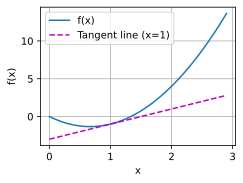

In [ ]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

# 2.5 Automatic Differentiation

# 2.5.1 A Simple Function

In [ ]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [ ]:
# Can also create x = torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
x.grad  # The gradient is None by default

In [ ]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [ ]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [ ]:
x.grad == 4 * x

tensor([True, True, True, True])

In [ ]:
x.grad.zero_()  # Reset the gradient
y = x.sum()
y.backward()
x.grad


tensor([1., 1., 1., 1.])

#2.5.2 Backward for Non-Scalar Variables

In [ ]:
x.grad.zero_()
y=x*x
y.backward(gradient=torch.ones(len(y))) # Faster: y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

#2.5.3 Detaching Computation

In [ ]:
x.grad.zero_()
y=x*x
u = y.detach()
z=u*x
z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [ ]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

#2.5.4 Gradients and Python Control Flow

In [172]:
def f(a):
  b=a*2
  while b.norm() < 1000:
    b=b*2
  if b.sum() > 0:
    c=b
  else:
    c = 100 * b
  return c

In [175]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [176]:
a.grad == d / a

tensor(True)

# 2.6 Вероятность и статистика

In [3]:
%matplotlib inline
!pip install d2l==0.17.0
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.0 MB/s eta 0:00:00


# 2.6.1 A Simple Example: Tossing Coins

In [4]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [49, 51]


In [8]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample()

tensor([50., 50.])

In [9]:
Multinomial(100, fair_probs).sample() / 100

tensor([0.5600, 0.4400])

In [10]:
counts = Multinomial(10000, fair_probs).sample()
counts / 10000

tensor([0.5034, 0.4966])

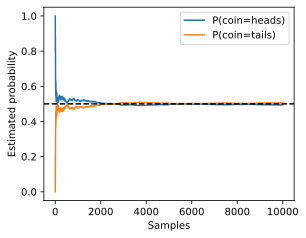

In [11]:
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()
d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();